# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [4]:
data_matrix = Matrix(data)'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [7]:
# cluster data into 15 clusters using K-means
num_clusters = 15
result = kmeans(data_matrix, num_clusters; maxiter=200, display=:iter);

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.935726e+13
      1       1.555054e+13      -1.380673e+13 |       14
      2       1.334502e+13      -2.205515e+12 |        9
      3       1.329699e+13      -4.803654e+10 |        4
      4       1.329655e+13      -4.407324e+08 |        2
      5       1.329640e+13      -1.435112e+08 |        2
      6       1.329619e+13      -2.094218e+08 |        2
      7       1.329613e+13      -6.320166e+07 |        2
      8       1.329612e+13      -9.303523e+06 |        0
      9       1.329612e+13       0.000000e+00 |        0
K-means converged with 9 iterations (objv = 1.3296121374215367e13)


In [11]:
@assert nclusters(result) == num_clusters  # verify the number of clusters

In [14]:
data[!, :cluster] = string.(assignments(result));  # get the assignments of points to clusters
c = counts(result)  # get the cluster sizes
M = result.centers  # get the cluster centers
println(c)
println(M)

[351, 317, 341, 345, 340, 351, 631, 108, 339, 314, 334, 246, 357, 329, 297]
[507818.3133903134 823867.7570977918 244654.88563049852 139395.22898550724 320602.55 398870.0484330484 827823.6259904912 652413.1296296297 619060.1356932153 417799.6942675159 167856.14071856288 679722.4146341464 858527.1764705882 337264.7629179331 606574.9562289562; 175610.41595441595 730721.7192429022 847642.0410557184 558143.9420289855 161521.85 404924.06552706554 235157.73692551506 892096.0277777778 398854.8702064897 787001.9936305733 347812.7155688623 849364.731707317 543111.4089635854 562123.3799392097 574455.1683501684]


In [18]:
data

5000×3 DataFrame
│ Row  │ x      │ y      │ cluster │
│      │ Int64  │ Int64  │ String  │
├──────┼────────┼────────┼─────────┤
│ 1    │ 664159 │ 550946 │ 15      │
│ 2    │ 665845 │ 557965 │ 15      │
│ 3    │ 597173 │ 575538 │ 15      │
│ 4    │ 618600 │ 551446 │ 15      │
│ 5    │ 635690 │ 608046 │ 15      │
│ 6    │ 588100 │ 557588 │ 15      │
│ 7    │ 582015 │ 546191 │ 15      │
│ 8    │ 604678 │ 574577 │ 15      │
│ 9    │ 572029 │ 518313 │ 15      │
│ 10   │ 604737 │ 574591 │ 15      │
⋮
│ 4990 │ 681053 │ 892766 │ 8       │
│ 4991 │ 683321 │ 873932 │ 12      │
│ 4992 │ 701017 │ 931252 │ 8       │
│ 4993 │ 645677 │ 814395 │ 12      │
│ 4994 │ 677362 │ 853471 │ 12      │
│ 4995 │ 659046 │ 930099 │ 8       │
│ 4996 │ 665426 │ 853940 │ 12      │
│ 4997 │ 691827 │ 863963 │ 12      │
│ 4998 │ 650661 │ 861267 │ 8       │
│ 4999 │ 599647 │ 858702 │ 8       │
│ 5000 │ 684091 │ 842566 │ 12      │

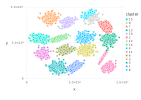

In [20]:
plot(data, x="x", y="y", color="cluster", Geom.point)